In [549]:
import torch.optim as optim
import matplotlib.pyplot as plt
from ggmm import GMM

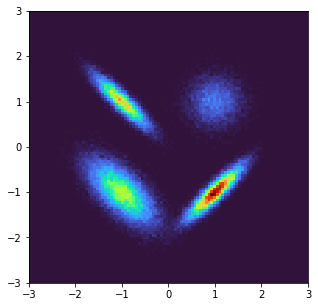

In [550]:
np.random.seed(42)

N = 100000
Ns = (np.array([0.1, 0.2, 0.3, 0.4]) * N).astype(int)

data_1 = scipy.stats.multivariate_normal(mean=[1, 1], cov=[[0.1, 0], [0, 0.1]]).rvs(Ns[0])
data_2 = scipy.stats.multivariate_normal(mean=[-1, 1], cov=[[0.1, -0.09], [-0.09, 0.1]]).rvs(Ns[1])
data_3 = scipy.stats.multivariate_normal(mean=[1, -1], cov=[[0.1, 0.09], [0.09, 0.1]]).rvs(Ns[2])
data_4 = scipy.stats.multivariate_normal(mean=[-1, -1], cov=[[0.15, -0.1], [-0.1, 0.15]]).rvs(Ns[3])

data = np.vstack([data_1, data_2, data_3, data_4])

# prepare for pytorch
data_torch = torch.from_numpy(data)

plt.figure(figsize=(5, 5))
plt.hist2d(data[:,0], data[:,1], bins=100, cmap="turbo", range=[[-3, 3], [-3, 3]])
plt.show()

In [573]:
gmm = GMM(D=2, K=4, cov_style="full")
opt = optim.Adam(gmm.parameters(), lr=3e-2)

mean_neg_log_liks = []
for i in range(1, 1000+1):
    mean_neg_log_lik = - gmm.log_prob(data_torch, train_categorical=True).mean()
    mean_neg_log_liks.append(float(mean_neg_log_lik))
    if i % 100 == 0:
        print(i, float(mean_neg_log_lik))
    opt.zero_grad()
    mean_neg_log_lik.backward()
    opt.step()

100 1.4437702894210815
200 1.44082510471344
300 1.44082510471344
400 1.44082510471344
500 1.44082510471344
600 1.44082510471344
700 1.44082510471344
800 1.44082510471344
900 1.44082510471344
1000 1.44082510471344


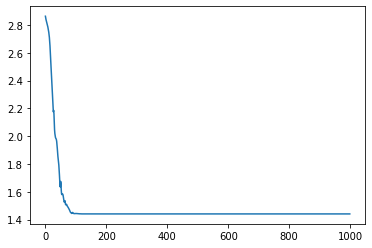

In [574]:
plt.plot(mean_neg_log_liks)
plt.show()

In [575]:
# gmm = FullRankGaussianMixture(D=2, K=4)
# opt = optim.LBFGS(gmm.parameters(), lr=1e-2)

# for i in tqdm(range(1, 100+1)):
#     def closure():
#         opt.zero_grad()
#         mean_neg_log_lik = - gmm.log_prob(data_torch, train_categorical=True).mean()
#         mean_neg_log_lik.backward()
#         return mean_neg_log_lik
#     opt.step(closure)

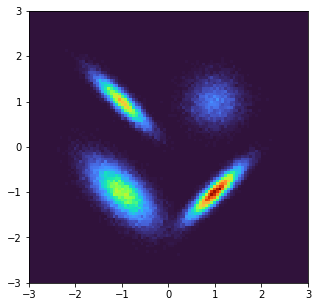

In [576]:
with torch.no_grad():
    samples = gmm.sample(N=100000).numpy()

plt.figure(figsize=(5, 5))
plt.hist2d(samples[:,0], samples[:,1], bins=100, cmap="turbo", range=[[-3, 3], [-3, 3]])
plt.show()

In [577]:
gmm.Σs

tensor([[[ 0.1006, -0.0903],
         [-0.0903,  0.1001]],

        [[ 0.1024, -0.0004],
         [-0.0004,  0.0989]],

        [[ 0.1491, -0.0991],
         [-0.0991,  0.1493]],

        [[ 0.1013,  0.0910],
         [ 0.0910,  0.1005]]], grad_fn=<BmmBackward0>)

In [578]:
gmm.μs

Parameter containing:
tensor([[-1.0028,  1.0011],
        [ 1.0011,  1.0022],
        [-1.0023, -0.9995],
        [ 0.9975, -1.0025]], requires_grad=True)

In [579]:
torch.softmax(gmm.pre_π, dim=0)

tensor([0.2000, 0.1000, 0.4000, 0.2999], grad_fn=<SoftmaxBackward0>)